In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import matplotlib.pyplot as plt

## (a)

In [2]:
batch_size = 32
num_classes = 10
epochs = 10
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')

## Original CNN

In [3]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [5]:
model_name = 'original_CNN.h5'
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

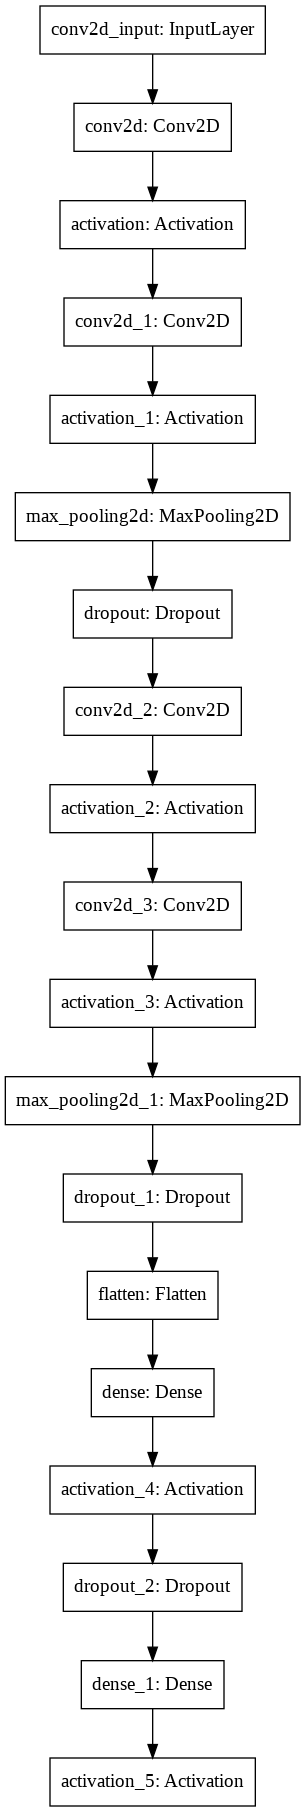

In [6]:
keras.utils.plot_model(model)

In [ ]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
if not data_augmentation:
    print('Not using data augmentation.')
    result = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    result = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Using real-time data augmentation.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.8760 - accuracy: 0.3077 - val_loss: 1.5660 - val_accuracy: 0.4303
Epoch 2/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.5865 - accuracy: 0.4205 - val_loss: 1.3944 - val_accuracy: 0.4968
Epoch 3/10
1563/1563 [==============================] - 34s 21ms/step - loss: 1.4672 - accuracy: 0.4707 - val_loss: 1.3145 - val_accuracy: 0.5295
Epoch 4/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.3793 - accuracy: 0.5037 - val_loss: 1.2038 - val_accuracy: 0.5693
Epoch 5/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.3180 - accuracy: 0.5327 - val_loss: 1.1599 - val_accuracy: 0.5862
Epoch 6/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.2689 - accuracy: 0.5522 - val_loss: 1.1487 - val_accuracy: 0.5898
Epoch 7/10
15

## 0 hidden layer

In [7]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
model_name = 'DNN_0.h5'
model = Sequential()
model.add(Flatten(input_shape=x_train.shape[1:]))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

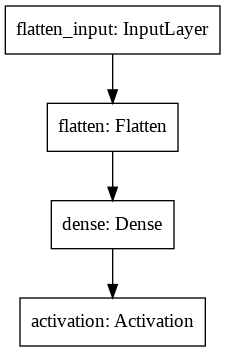

In [5]:
keras.utils.plot_model(model)

In [ ]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
if not data_augmentation:
    print('Not using data augmentation.')
    result0 = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    result0 = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Using real-time data augmentation.
Epoch 1/10
1563/1563 [==============================] - 32s 20ms/step - loss: 2.0172 - accuracy: 0.2758 - val_loss: 1.8838 - val_accuracy: 0.3428
Epoch 2/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.9074 - accuracy: 0.3288 - val_loss: 1.8514 - val_accuracy: 0.3536
Epoch 3/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.8829 - accuracy: 0.3386 - val_loss: 1.8152 - val_accuracy: 0.3655
Epoch 4/10
1563/1563 [==============================] - 32s 21ms/step - loss: 1.8650 - accuracy: 0.3451 - val_loss: 1.8023 - val_accuracy: 0.3792
Epoch 5/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.8575 - accuracy: 0.3501 - val_loss: 1.7839 - val_accuracy: 0.3808
Epoch 6/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.8466 - accuracy: 0.3523 - val_loss: 1.7782 - val_accuracy: 0.3906
Epoch 7/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.8397 - ac

## 1 hidden layer

In [ ]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [6]:
model_name = 'DNN_1.h5'
model = Sequential()
model.add(Flatten(input_shape=x_train.shape[1:]))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

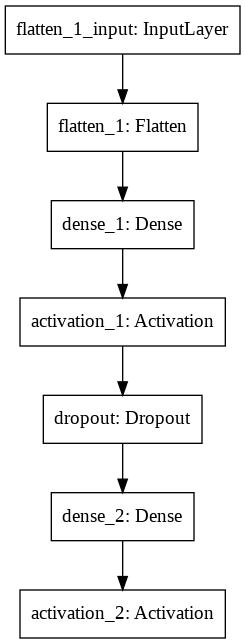

In [7]:
keras.utils.plot_model(model)

In [ ]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
if not data_augmentation:
    print('Not using data augmentation.')
    result1 = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    result1 = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Using real-time data augmentation.
Epoch 1/10
1563/1563 [==============================] - 32s 20ms/step - loss: 2.0236 - accuracy: 0.2606 - val_loss: 1.8291 - val_accuracy: 0.3484
Epoch 2/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.8899 - accuracy: 0.3214 - val_loss: 1.7575 - val_accuracy: 0.3799
Epoch 3/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.8447 - accuracy: 0.3404 - val_loss: 1.6971 - val_accuracy: 0.4071
Epoch 4/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.8151 - accuracy: 0.3496 - val_loss: 1.6601 - val_accuracy: 0.4160
Epoch 5/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.7940 - accuracy: 0.3624 - val_loss: 1.6353 - val_accuracy: 0.4266
Epoch 6/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.7760 - accuracy: 0.3655 - val_loss: 1.6100 - val_accuracy: 0.4434
Epoch 7/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.7601 - ac

## 2 hidden layer

In [ ]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
model_name = 'DNN_2.h5'
model = Sequential()
model.add(Flatten(input_shape=x_train.shape[1:]))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [ ]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
if not data_augmentation:
    print('Not using data augmentation.')
    result2 = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    result2 = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Using real-time data augmentation.
Epoch 1/10
1563/1563 [==============================] - 32s 20ms/step - loss: 2.0924 - accuracy: 0.2283 - val_loss: 1.8854 - val_accuracy: 0.3363
Epoch 2/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.9512 - accuracy: 0.2912 - val_loss: 1.7954 - val_accuracy: 0.3594
Epoch 3/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.9015 - accuracy: 0.3122 - val_loss: 1.7275 - val_accuracy: 0.3879
Epoch 4/10
1563/1563 [==============================] - 32s 21ms/step - loss: 1.8730 - accuracy: 0.3257 - val_loss: 1.6986 - val_accuracy: 0.4066
Epoch 5/10
1563/1563 [==============================] - 32s 21ms/step - loss: 1.8539 - accuracy: 0.3327 - val_loss: 1.6539 - val_accuracy: 0.4231
Epoch 6/10
1563/1563 [==============================] - 32s 21ms/step - loss: 1.8396 - accuracy: 0.3404 - val_loss: 1.6632 - val_accuracy: 0.4270
Epoch 7/10
1563/1563 [==============================] - 32s 21ms/step - loss: 1.8219 - ac

## 3 hidden layer

In [ ]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
model_name = 'DNN_3.h5'
model = Sequential()
model.add(Flatten(input_shape=x_train.shape[1:]))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [ ]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
if not data_augmentation:
    print('Not using data augmentation.')
    result3 = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    result3 = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Using real-time data augmentation.
Epoch 1/10
1563/1563 [==============================] - 32s 21ms/step - loss: 2.1495 - accuracy: 0.1918 - val_loss: 1.9476 - val_accuracy: 0.2970
Epoch 2/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.9946 - accuracy: 0.2635 - val_loss: 1.8332 - val_accuracy: 0.3462
Epoch 3/10
1563/1563 [==============================] - 32s 21ms/step - loss: 1.9430 - accuracy: 0.2899 - val_loss: 1.7910 - val_accuracy: 0.3642
Epoch 4/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.9176 - accuracy: 0.3023 - val_loss: 1.7843 - val_accuracy: 0.3695
Epoch 5/10
1563/1563 [==============================] - 32s 21ms/step - loss: 1.9006 - accuracy: 0.3104 - val_loss: 1.7446 - val_accuracy: 0.3849
Epoch 6/10
1563/1563 [==============================] - 32s 21ms/step - loss: 1.8818 - accuracy: 0.3191 - val_loss: 1.7802 - val_accuracy: 0.3810
Epoch 7/10
1563/1563 [==============================] - 32s 21ms/step - loss: 1.8681 - ac

## 4 hidden layer

In [ ]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
model_name = 'DNN_4.h5'
model = Sequential()
model.add(Flatten(input_shape=x_train.shape[1:]))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [ ]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
if not data_augmentation:
    print('Not using data augmentation.')
    result4 = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    result4 = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Using real-time data augmentation.
Epoch 1/10
1563/1563 [==============================] - 32s 21ms/step - loss: 2.2090 - accuracy: 0.1572 - val_loss: 2.0501 - val_accuracy: 0.2310
Epoch 2/10
1563/1563 [==============================] - 32s 20ms/step - loss: 2.0527 - accuracy: 0.2244 - val_loss: 1.9359 - val_accuracy: 0.3002
Epoch 3/10
1563/1563 [==============================] - 32s 20ms/step - loss: 2.0022 - accuracy: 0.2517 - val_loss: 1.8636 - val_accuracy: 0.3363
Epoch 4/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.9704 - accuracy: 0.2687 - val_loss: 1.8368 - val_accuracy: 0.3474
Epoch 5/10
1563/1563 [==============================] - 32s 21ms/step - loss: 1.9531 - accuracy: 0.2779 - val_loss: 1.8455 - val_accuracy: 0.3554
Epoch 6/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.9269 - accuracy: 0.2929 - val_loss: 1.8455 - val_accuracy: 0.3534
Epoch 7/10
1563/1563 [==============================] - 34s 21ms/step - loss: 1.9181 - ac

## Graph

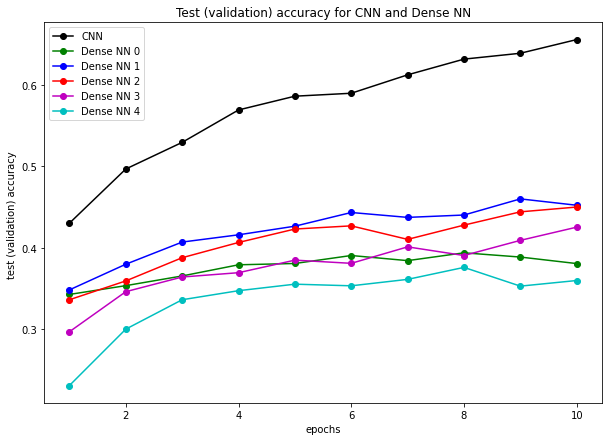

In [ ]:
fig = plt.figure(figsize=(10,7))
plt.plot(range(1,epochs+1), result.history['val_accuracy'], 'k-o', label="CNN")
plt.plot(range(1,epochs+1), result0.history['val_accuracy'], 'g-o', label="Dense NN 0")
plt.plot(range(1,epochs+1), result1.history['val_accuracy'], 'b-o', label="Dense NN 1")
plt.plot(range(1,epochs+1), result2.history['val_accuracy'], 'r-o', label="Dense NN 2")
plt.plot(range(1,epochs+1), result3.history['val_accuracy'], 'm-o', label="Dense NN 3")
plt.plot(range(1,epochs+1), result4.history['val_accuracy'], 'c-o', label="Dense NN 4")
plt.xlabel('epochs')
plt.ylabel('test (validation) accuracy ')
plt.title("Test (validation) accuracy for CNN and Dense NN")
plt.legend(loc = 'best')
plt.show()

From the plot above, we could see the original CNN fits best with a highest test(validation) accuracy. Since the original CNN has fewer parameters (shared weights on convolutional layer), the optimization process is easier. Also, with fewer parameters and the dropout layer, the overfitting problem could be prevented.

Among the Dense Neural Network,  we could see DNN with 1 hidden layer performs the best, and DNN with 4 hidden layers is the worst. One reason could be that: as the number of hidden layers increase,  it is difficult to find the optimal weights with this given optimizer. The overfitting problem may also exist for DNN with large amount of hidden layers since we provide so many parameters to train.

## (b)

Original CNN is with rectified linear units (relu).

## CNN with sigmoid units

In [8]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [9]:
model_name = 'CNN_S.h5'
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('sigmoid'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('sigmoid'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [ ]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
if not data_augmentation:
    print('Not using data augmentation.')
    resultS = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    resultS = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)



Using real-time data augmentation.
Epoch 1/10
1563/1563 [==============================] - 35s 22ms/step - loss: 2.3337 - accuracy: 0.0985 - val_loss: 2.3046 - val_accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 34s 22ms/step - loss: 2.3076 - accuracy: 0.1003 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 35s 22ms/step - loss: 2.3063 - accuracy: 0.1021 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 35s 22ms/step - loss: 2.3056 - accuracy: 0.0986 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 35s 22ms/step - loss: 2.3048 - accuracy: 0.0998 - val_loss: 2.3034 - val_accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 35s 22ms/step - loss: 2.3048 - accuracy: 0.1015 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 35s 23ms/step - loss: 2.3044 - ac

## Graph

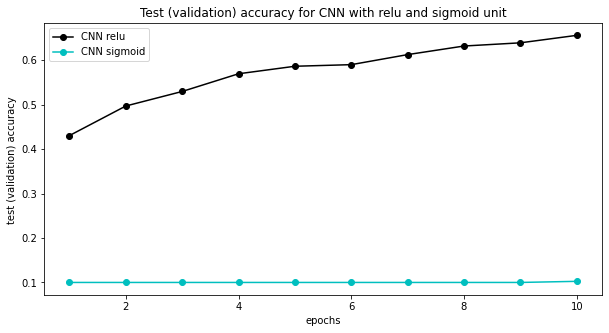

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.plot(range(1,epochs+1), result.history['val_accuracy'], 'k-o', label="CNN relu")
plt.plot(range(1,epochs+1), resultS.history['val_accuracy'], 'c-o', label="CNN sigmoid")
plt.xlabel('epochs')
plt.ylabel('test (validation) accuracy ')
plt.title("Test (validation) accuracy for CNN with relu and sigmoid unit")
plt.legend(loc = 'best')
plt.show()

From the plot above, we could see the original CNN with relu as activation function fits better with a higher test (validation) accuracy than CNN with sigmoid units.

CNN with sigmoid units has nearly 0.1 test (validation) accuracy for the first 10 epoches and has no improvement since it may encounter the gradient vanishing problem (which usually happened at the first several epoches). If the starting point is near the tails of the sigmoid function, then the gradient is nearly 0 and the updated weights may have tiny change and leads to almost no improvement at the beginning.

## (c)

First we change the epoches to be 100.

In [ ]:
epochs = 100

## Original CNN

The original CNN is with drop out and with data augmentation.

In [ ]:
data_augmentation = True

In [ ]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

170500096/170498071 [==============================] - 11s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
model_name = 'CNN_11.h5'
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [ ]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
if not data_augmentation:
    print('Not using data augmentation.')
    result11 = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    result11 = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Using real-time data augmentation.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
1563/1563 [==============================] - 48s 30ms/step - loss: 1.8772 - accuracy: 0.3061 - val_loss: 1.6057 - val_accuracy: 0.4029
Epoch 2/100
1563/1563 [==============================] - 47s 30ms/step - loss: 1.5940 - accuracy: 0.4144 - val_loss: 1.4037 - val_accuracy: 0.4952
Epoch 3/100
1563/1563 [==============================] - 48s 31ms/step - loss: 1.4703 - accuracy: 0.4648 - val_loss: 1.3169 - val_accuracy: 0.5361
Epoch 4/100
1563/1563 [==============================] - 47s 30ms/step - loss: 1.3743 - accuracy: 0.5043 - val_loss: 1.2620 - val_accuracy: 0.5470
Epoch 5/100
1563/1563 [==============================] - 47s 30ms/step - loss: 1.3080 - accuracy: 0.5340 - val_loss: 1.1524 - val_accuracy: 0.5898
Epoch 6/100
1563/1563 [==============================] - 46s 29ms/step - loss: 1.2406 - accuracy: 0.5585 - val_loss: 1.0871 - val_accuracy: 0.6178
Epoch 7

## CNN without drop out and with data augmentation.

In [ ]:
data_augmentation = True

In [ ]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
model_name = 'CNN_01.h5'
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [ ]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
if not data_augmentation:
    print('Not using data augmentation.')
    result01 = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    result01 = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Using real-time data augmentation.
Epoch 1/100
1563/1563 [==============================] - 44s 28ms/step - loss: 1.7347 - accuracy: 0.3695 - val_loss: 1.4690 - val_accuracy: 0.4704
Epoch 2/100
1563/1563 [==============================] - 44s 28ms/step - loss: 1.4549 - accuracy: 0.4808 - val_loss: 1.3328 - val_accuracy: 0.5357
Epoch 3/100
1563/1563 [==============================] - 44s 28ms/step - loss: 1.3271 - accuracy: 0.5270 - val_loss: 1.1990 - val_accuracy: 0.5686
Epoch 4/100
1563/1563 [==============================] - 45s 29ms/step - loss: 1.2284 - accuracy: 0.5638 - val_loss: 1.0844 - val_accuracy: 0.6218
Epoch 5/100
1563/1563 [==============================] - 44s 28ms/step - loss: 1.1518 - accuracy: 0.5955 - val_loss: 1.1634 - val_accuracy: 0.5931
Epoch 6/100
1563/1563 [==============================] - 44s 28ms/step - loss: 1.0918 - accuracy: 0.6159 - val_loss: 0.9968 - val_accuracy: 0.6465
Epoch 7/100
1563/1563 [==============================] - 45s 28ms/step - loss: 1.04

## CNN with drop out and without data augmentation.

In [ ]:
data_augmentation = False

In [ ]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
model_name = 'CNN_10.h5'
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [ ]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
if not data_augmentation:
    print('Not using data augmentation.')
    result10 = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    result10 = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Not using data augmentation.
Epoch 1/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.8202 - accuracy: 0.3292 - val_loss: 1.5510 - val_accuracy: 0.4277
Epoch 2/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5263 - accuracy: 0.4429 - val_loss: 1.4757 - val_accuracy: 0.4617
Epoch 3/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.3878 - accuracy: 0.4983 - val_loss: 1.2759 - val_accuracy: 0.5451
Epoch 4/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2879 - accuracy: 0.5417 - val_loss: 1.2082 - val_accuracy: 0.5704
Epoch 5/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2079 - accuracy: 0.5706 - val_loss: 1.1098 - val_accuracy: 0.6047
Epoch 6/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1398 - accuracy: 0.5967 - val_loss: 1.0882 - val_accuracy: 0.6185
Epoch 7/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0758 - a

## CNN without drop out and without data augmentation.

In [ ]:
data_augmentation = False

In [ ]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
model_name = 'CNN_00.h5'
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [ ]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
if not data_augmentation:
    print('Not using data augmentation.')
    result00 = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    result00 = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Not using data augmentation.
Epoch 1/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.6574 - accuracy: 0.4069 - val_loss: 1.4808 - val_accuracy: 0.4781
Epoch 2/100
1563/1563 [==============================] - 15s 10ms/step - loss: 1.3272 - accuracy: 0.5320 - val_loss: 1.2927 - val_accuracy: 0.5474
Epoch 3/100
1563/1563 [==============================] - 15s 10ms/step - loss: 1.1753 - accuracy: 0.5872 - val_loss: 1.1581 - val_accuracy: 0.5974
Epoch 4/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0631 - accuracy: 0.6295 - val_loss: 1.1181 - val_accuracy: 0.6037
Epoch 5/100
1563/1563 [==============================] - 15s 10ms/step - loss: 0.9756 - accuracy: 0.6617 - val_loss: 1.0132 - val_accuracy: 0.6462
Epoch 6/100
1563/1563 [==============================] - 15s 10ms/step - loss: 0.9007 - accuracy: 0.6884 - val_loss: 0.9894 - val_accuracy: 0.6556
Epoch 7/100
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8402 - a

## Graph

Figure for training accuracy

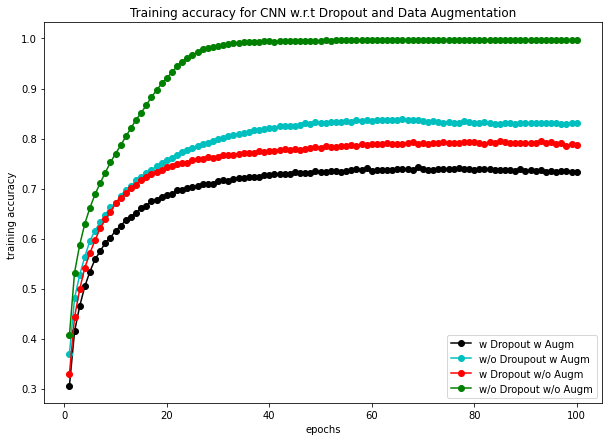

In [ ]:
fig = plt.figure(figsize=(10,7))
plt.plot(range(1,epochs+1), result11.history['accuracy'], 'k-o', label="w Dropout w Augm")
plt.plot(range(1,epochs+1), result01.history['accuracy'], 'c-o', label="w/o Droupout w Augm")
plt.plot(range(1,epochs+1), result10.history['accuracy'], 'r-o', label="w Dropout w/o Augm")
plt.plot(range(1,epochs+1), result00.history['accuracy'], 'g-o', label="w/o Dropout w/o Augm")
plt.xlabel('epochs')
plt.ylabel('training accuracy ')
plt.title("Training accuracy for CNN w.r.t Dropout and Data Augmentation")
plt.legend(loc = 'best')
plt.show()

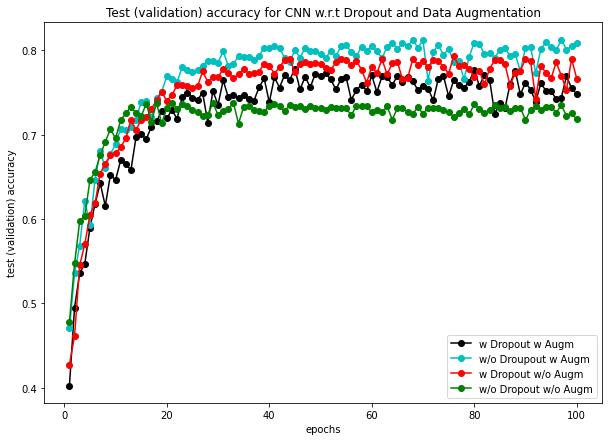

In [ ]:
fig = plt.figure(figsize=(10,7))
plt.plot(range(1,epochs+1), result11.history['val_accuracy'], 'k-o', label="w Dropout w Augm")
plt.plot(range(1,epochs+1), result01.history['val_accuracy'], 'c-o', label="w/o Droupout w Augm")
plt.plot(range(1,epochs+1), result10.history['val_accuracy'], 'r-o', label="w Dropout w/o Augm")
plt.plot(range(1,epochs+1), result00.history['val_accuracy'], 'g-o', label="w/o Dropout w/o Augm")
plt.xlabel('epochs')
plt.ylabel('test (validation) accuracy')
plt.title("Test (validation) accuracy for CNN w.r.t Dropout and Data Augmentation")
plt.legend(loc = 'best')
plt.show()

From the two plots above, we could see CNN without droupout and without data augmentation converges fastest and has a highest training accuracy, while has the lowest test(validation) accuracy. This is reasonable because this setting of network will has severe overfitting problem. 

Also, CNN without dropout and with data augmentation performs best in test(validation) accuracy so we could see data augmentation could improve the generalization. CNN with dropout could also improve the generalization, but if we already have data augmentation, the additional dropout layer may provide too much randomness and leads to a worse test (validation) accuracy. 